In [9]:
# Data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules for preprocessing and model training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# XGBoost
from xgboost import XGBClassifier

# SMOTE for handling class imbalance
from imblearn.over_sampling import SMOTE

print("Libraries imported successfully!")

Libraries imported successfully!


In [10]:
# Step 2: Load the Dataset
data = pd.read_csv('telco_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# Step 3: Preprocess the Data
try:
    # Drop customerID column since it's not useful for prediction
    data.drop('customerID', axis=1, inplace=True)

    # Convert 'TotalCharges' to numeric and fill missing values
    data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
    data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

    # Encode binary categorical columns
    binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
    for col in binary_cols:
        data[col] = LabelEncoder().fit_transform(data[col])

    # One-hot encode other categorical columns
    data = pd.get_dummies(data, drop_first=True)

    # Split into features and target
    X = data.drop('Churn', axis=1)
    y = data['Churn']

    # Print success message
    print("Preprocessing successful. Data is ready for model training.")

except Exception as e:
    print(f"An error occurred during preprocessing: {e}")

Preprocessing successful. Data is ready for model training.


In [12]:
try:
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Print success message
    print("Data splitting successful. Training and test sets are ready for model training.")

except Exception as e:
    print(f"An error occurred during data splitting: {e}")

Data splitting successful. Training and test sets are ready for model training.


In [13]:
# Step 5: Normalize the Features
try:
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  # Print success message
  print("Feature scaling successful. Data is ready for model training.")

except Exception as e:
  print(f"An error occurred during feature scaling: {e}")


Feature scaling successful. Data is ready for model training.


In [14]:
# Step 6: Handle Class Imbalance using SMOTE
try:
  smote = SMOTE(random_state=42)
  X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
  # Print success message
  print("Class imbalance handling successful. Data is ready for model training.")

except Exception as e:
  print(f"An error occurred during class imbalance handling: {e}")

Class imbalance handling successful. Data is ready for model training.


In [15]:
# Step 7: Train Multiple Models and Compare Performance
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Dictionary to store evaluation results
results = {}

# Train and evaluate each model
for name, model in models.items():
    try:
        # Fit the model
        model.fit(X_train_smote, y_train_smote)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Store results
        results[name] = {
            'Accuracy': accuracy,
            'F1 Score': f1
        }

        # Print results
        print(f"Model: {name}")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"F1 Score: {f1:.2f}")
        print(classification_report(y_test, y_pred))
        print('-' * 50)

    except Exception as e:
        print(f"An error occurred while evaluating {name}: {e}")

# Print a summary of results
print("Summary of results:")
results_df = pd.DataFrame(results).T
print(results_df)

Model: Logistic Regression
Accuracy: 0.76
F1 Score: 0.64
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409

--------------------------------------------------
Model: Decision Tree
Accuracy: 0.75
F1 Score: 0.56
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1036
           1       0.52      0.61      0.56       373

    accuracy                           0.75      1409
   macro avg       0.69      0.70      0.69      1409
weighted avg       0.76      0.75      0.75      1409

--------------------------------------------------
Model: Random Forest
Accuracy: 0.78
F1 Score: 0.59
              precision    recall  f1-score   support

           0       0.85      0

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:57:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
Accuracy: 0.79
F1 Score: 0.61
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1036
           1       0.61      0.61      0.61       373

    accuracy                           0.79      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409

--------------------------------------------------
Summary of results:
                     Accuracy  F1 Score
Logistic Regression  0.755855  0.643892
Decision Tree        0.748758  0.560794
Random Forest        0.784244  0.591398
KNN                  0.698368  0.559585
XGBoost              0.794180  0.609164


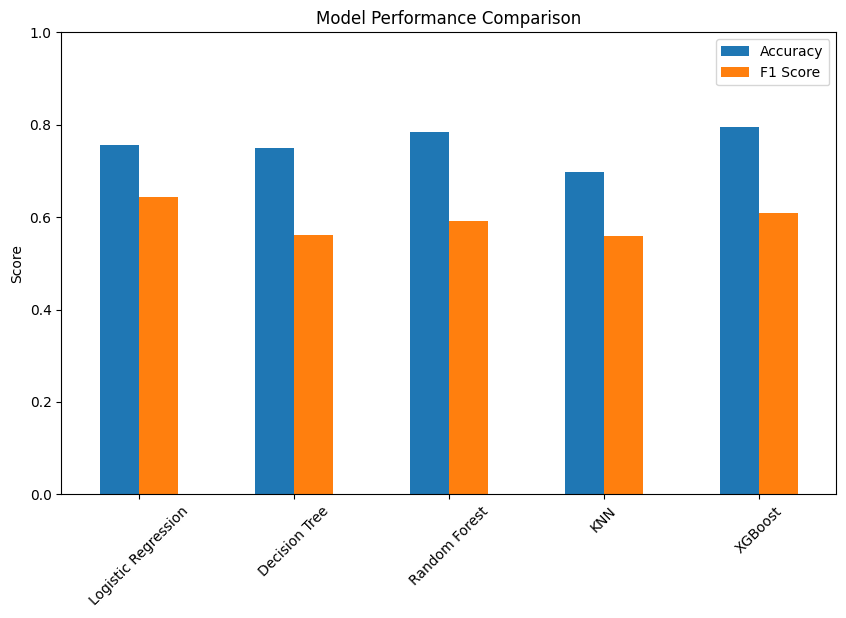

In [16]:
# Step 9: Visualize the Results
results_df.plot(kind='bar', figsize=(10, 6), ylim=(0, 1))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()